<a href="https://colab.research.google.com/github/JhonnyLimachi/Python/blob/main/Template_1_Analizando_los_Datos_del_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science en la Práctica 4.0**
*by [suma qamaña.ai](https://sumaqanaña.ai)*

---

# Análisis de los Datos del Airbnb - Rio de Janeiro

El [Airbnb](https://www.airbnb.com.br/) ya está considerada como la **mayor empresa hotelera de la actualidad**. Es más, ¡no es propietaria de ningún hotel!

Conectando a personas que quieren viajar (y alojarse) con anfitriones que quieren alquilar su propiedad de forma práctica, Airbnb ofrece una plataforma innovadora para hacer realidad esta alternativa de alojamiento.

A finales de 2018, la start-up fundada hace 10 años ya había **alojado a más de 300 millones** de personas en todo el mundo, desafiando a las cadenas hoteleras tradicionales.

Una de las iniciativas de Airbnb es poner a disposición los datos del sitio para algunas de las principales ciudades del mundo. A través de la (http://insideairbnb.com/get-the-data.html), se puede descargar una gran cantidad de datos para desarrollar *proyectos y soluciones de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**En este *cuaderno de notas*, analizaremos los datos de la ciudad de Río de Janeiro y veremos qué ideas pueden extraerse de los datos brutos.**

## Recogida de datos

Todos los datos utilizados aquí se obtuvieron del sitio web [Inside Airbnb] (http://insideairbnb.com/get-the-data.html).

Para este análisis exploratorio inicial, sólo se descargará el siguiente archivo:

* `listings.csv` - *Información resumida y métricas de los listados en Río de Janeiro (bueno para visualizaciones).

Importante: El portal está en constante evolución, y en algún momento, puede ser que el [dataset](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-04-26/visualisations/listings.csv) exacto utilizado en este cuaderno ya no esté disponible, lo que rompería nuestro código.

Teniendo esto en cuenta, hemos puesto a tu disposición el conjunto que utilizamos [aquí](https://www.dropbox.com/s/33gfbmmc09b2olm/listings.csv?dl=1), para que siempre puedas utilizar este material.

Con esto en mente, vayamos al proyecto.

In [ ]:
# importar los paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar el archivo listings.csv para un Dataframe
df = pd.read_csv("https://www.dropbox.com/s/33gfbmmc09b2olm/listings.csv?dl=1")

**Diccionario de variables**

* `id` - número de identificación generado para identificar la propiedad
* `name` - nombre de la propiedad anunciada
* `host_id` - número de identificación del propietario (host) del inmueble
* `host_name` - nombre del host
* `neighbourhood_group` - esta columna no contiene valores válidos
* `neighbourhood` - nombre del barrio
* `latitude` - coordenada de latitud de la propiedad
* `Longitud`: coordenada de longitud del inmueble.
* `Tipo de habitación`: indica el tipo de habitación que se ofrece.
* `Precio`: precio de alquiler de la propiedad.
* `minimum_nights` - número mínimo de noches para reservar
* `number_of_reviews` - número de opiniones que tiene la propiedad
* `last_review` - fecha de la última opinión
* `reviews_per_month` - número de opiniones por mes
* `Calculated_host_listings_count"`: número de propiedades que pertenecen al mismo anfitrión.
* `Disponibilidad 365 días`: número de días de disponibilidad en 365 días.

Antes de empezar cualquier análisis, comprobemos la cara de nuestro *dataset* analizando las 5 primeras entradas.

In [ ]:
# mostrar las 5 primeras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,190,5,260,2021-02-08,1.98,1,343
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,311,3,85,2018-02-14,0.66,1,73
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,267,2,181,2020-03-15,1.98,1,272
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,120,3,359,2021-04-21,2.79,1,139
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.98102,-43.19172,Entire home/apt,493,3,18,2016-02-09,0.18,2,365


### **Q1. ¿Cuántos atributos (variables) y cuántas entradas tiene nuestro conjunto de datos? ¿Cuáles son los tipos de las variables?**

Sigamos adelante e identifiquemos el número de entradas que tiene nuestro conjunto de datos y veamos los tipos de cada columna.

Este *dataset* que hemos descargado es la versión "resumida" de Airbnb. En la misma página descargamos el archivo `listings.csv`. Hay una versión más completa con 35847 entradas y 106 variables (`listings.csv.gz`).

In [ ]:
# identificar el volumen de datos del DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar las 5 primeras entradas del dataset
display(df.dtypes)

Entradas:	 26467
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. ¿Cuál es el porcentaje de valores que faltan en el conjunto de datos?**

La calidad de un *dataset* está directamente relacionada con el número de valores nulos. Es importante comprender desde el principio si estos valores nulos son significativos en comparación con el número total de entradas.

* Puede ver que en la columna "grupo_de_vecinos" falta el 100% de los valores.
* Las variables "reviews_per_month" y "last_review" tienen valores nulos en casi la mitad de las filas.
* Las variables "name" y "host_name" tienen aproximadamente un 0,1% de valores nulos.

In [ ]:
# Ordenar en orden decresciente las variábles por sus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
last_review                       0.371179
reviews_per_month                 0.371179
host_name                         0.032380
name                              0.001096
id                                0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

### **Q3. ¿Qué tipo de distribución tienen las variables?**

Para identificar la distribución de las variables, trazaré el histograma.

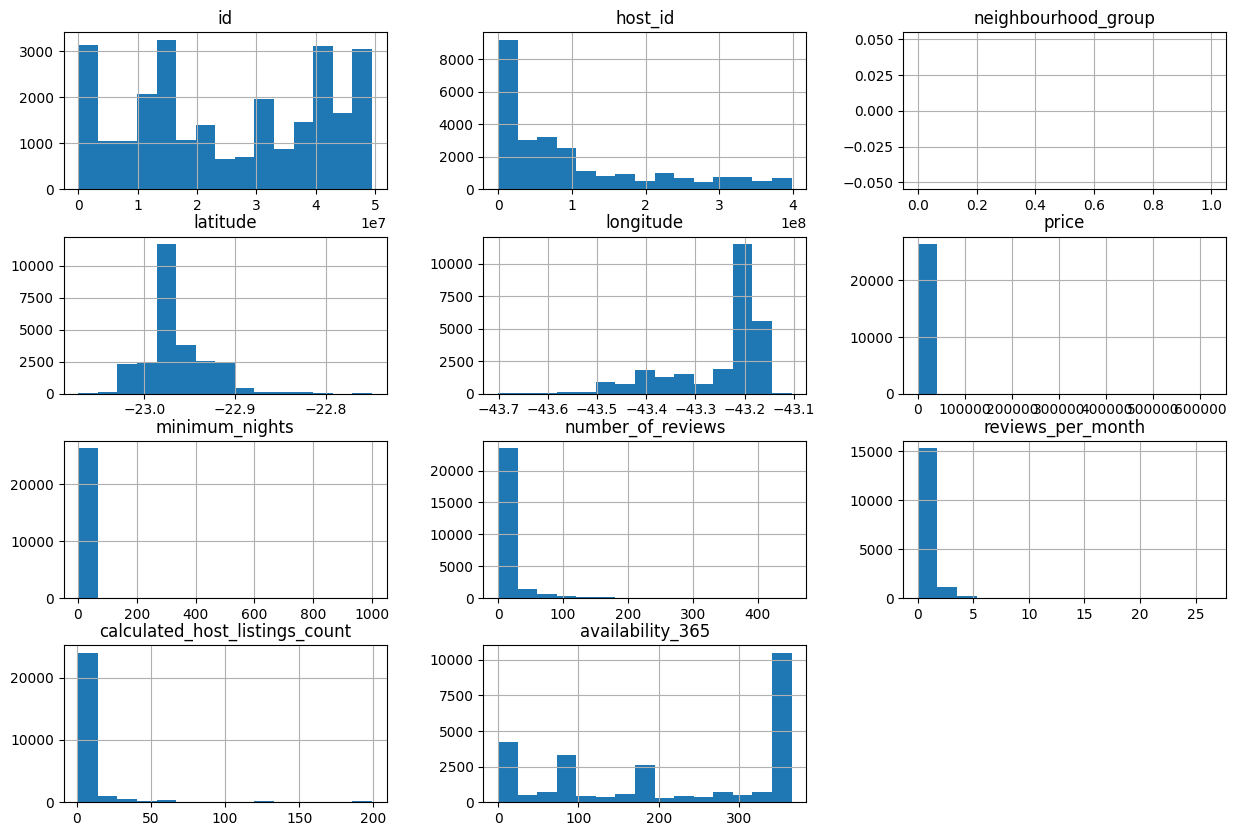

In [ ]:
# plotar el histograma de las variables numéricas
df.hist(bins=15, figsize=(15,10));

A partir de la distribución del histograma, puede ver que hay "valores atípicos". Por ejemplo, fíjese en las variables `price`, `minimum_nights` y `calculated_host_listings_count`.

Los valores no siguen una distribución y distorsionan toda la representación gráfica. Para confirmarlo, hay dos formas rápidas de ayudar a detectar los valores "atípicos". Éstas son:

* Resumen estadístico utilizando el método `describe()`.
* Trazar `boxplots` para la variable.

In [ ]:
# ver el resumen estatísdico de las variábles numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,26467.000000,26467.00000,26467.000000,16643.000000,26467.000000,26467.000000
mean,734.860052,4.80096,12.417501,0.580291,6.919220,214.943099
std,5274.600381,19.21445,30.313117,0.823784,21.310525,143.136520
min,0.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,150.000000,1.00000,0.000000,0.080000,1.000000,88.000000
50%,260.000000,2.00000,2.000000,0.260000,1.000000,223.000000
75%,529.000000,4.00000,9.000000,0.770000,3.000000,364.000000
max,623592.000000,1000.00000,452.000000,26.430000,199.000000,365.000000


Si observamos los estadísticos resumidos anteriores, podemos confirmar algunas hipótesis como:

* La variable `price` tiene el 75% de su valor por debajo de 529, pero su valor máximo es 623592.
* El número mínimo de noches (`minimum_nights`) es superior a 365 días al año.

#### Boxplot para minimum_nights

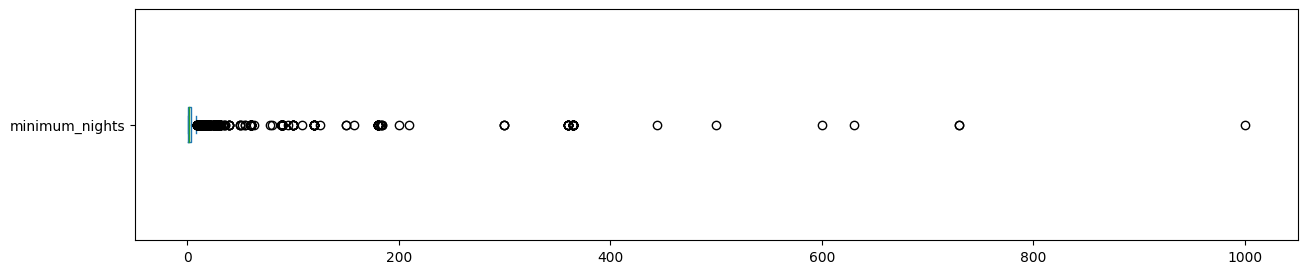

minimum_nights: valores acima de 30:
216 entradas
0.8161%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver cantidad de valores arriba de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

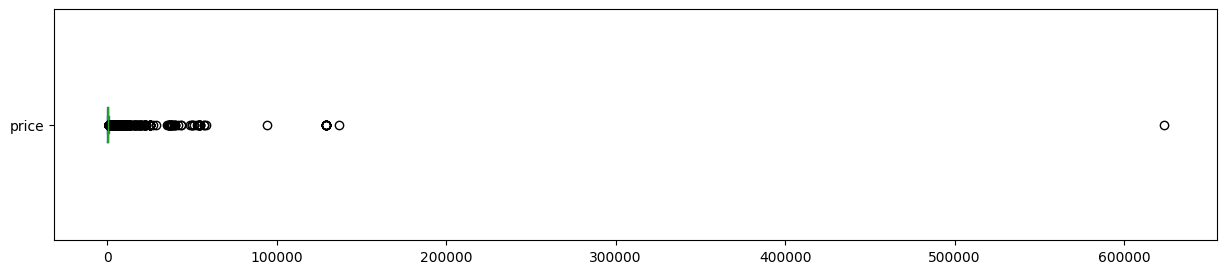


price: valores arriba de 1500
1773 entradas
6.6989%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver cantidad de valores arriba de 1500 para price
print("\nprice: valores arriba de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sin *outliers

Ya que hemos identificado los *outliers* en las variables `price` y `minimum_nights`, vamos a limpiar el *DataFrame* de ellos y trazar el histograma de nuevo.

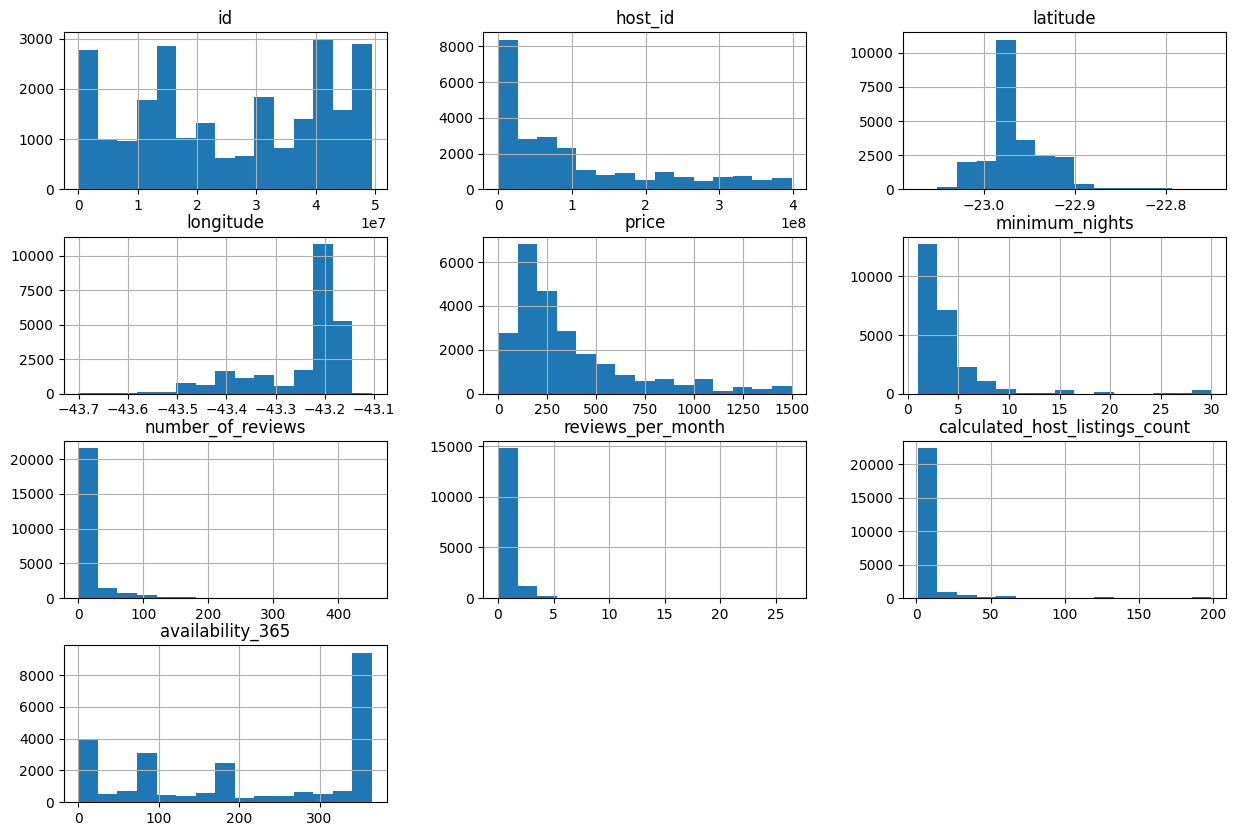

In [ ]:
# remover los *outliers* en un nuevo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pues esta vacio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar el histograma para las variábles numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. ¿Qué correlación existe entre las variables?**

Correlación significa que existe una relación entre dos cosas. En nuestro contexto, buscamos una relación o similitud entre dos variables.

Esta relación puede medirse, y es tarea del coeficiente de correlación establecer su intensidad. Para identificar las correlaciones entre las variables de interés:

* Crear una matriz de correlaciones
* Generar un "mapa de calor" a partir de esta matriz, utilizando la biblioteca "seaborn".

In [ ]:
# crear una matriz de correlación
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.130315,-0.161856,-0.175125,0.067542,0.078650
minimum_nights,0.130315,1.000000,-0.060445,-0.097327,-0.044090,-0.019873
number_of_reviews,-0.161856,-0.060445,1.000000,0.642706,-0.047373,-0.066912
reviews_per_month,-0.175125,-0.097327,0.642706,1.000000,-0.013627,-0.130992
calculated_host_listings_count,0.067542,-0.044090,-0.047373,-0.013627,1.000000,0.025664
availability_365,0.078650,-0.019873,-0.066912,-0.130992,0.025664,1.000000


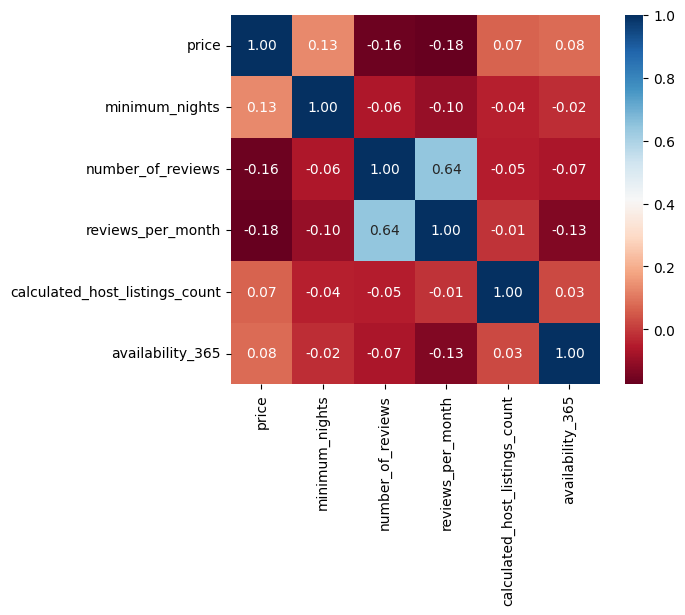

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. ¿Qué tipo de propiedad se alquila con más frecuencia en Airbnb?**

La columna `room_type` indica el tipo de propiedad que se anuncia en Airbnb. Si alguna vez ha alquilado en el sitio, sabrá que hay opciones para apartamentos/casas enteras, sólo para alquilar una habitación o incluso para compartir una habitación con otras personas.

Vamos a contar el número de ocurrencias de cada tipo de alquiler, utilizando el método `value_counts()`.

In [ ]:
# mostrar la cantidad de cada tipo de inmueble disponible
df_clean.room_type.value_counts()

Entire home/apt    17368
Private room        6447
Shared room          593
Hotel room            90
Name: room_type, dtype: int64

In [ ]:
# mostrar el porcentaje de cada tipo de inmueble disponible
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.708956
Private room       0.263164
Shared room        0.024206
Hotel room         0.003674
Name: room_type, dtype: float64

### **Q6. ¿Cuál es el barrio más caro de Río?

Una forma de contrastar una variable con otra es utilizar `groupby()`. En este caso, queremos comparar barrios en función del precio del alquiler.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Caju             1325.000000
Cavalcanti        925.000000
Realengo          888.714286
Vaz Lobo          830.000000
Anchieta          800.000000
Manguinhos        573.333333
Paciência         567.285714
Rocha Miranda     564.500000
Sepetiba          562.000000
Grumari           536.666667
Name: price, dtype: float64

Arriba, vemos que barrios como Caju, Cavalcanti y R tienen precios medios más altos que lugares como Leblon, Barra da Tijuca y Lagoa.

Una persona que no conozca Río podría presentar estos resultados sin ninguna duda. Sólo para dar un ejemplo de lo poco representativa que puede ser una muestra, mire cuántas entradas hay para Vaz Lobo.

In [ ]:
# ver cantidad de inmuebles en el Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

# ver las 3 entradas del Complexo do Alemão
df_clean[df_clean.neighbourhood == "Vaz Lobo"]

(2, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9274,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85527,-43.32623,Entire home/apt,1360,15,0,NaN,NaN,1,365
20956,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86187,-43.32458,Private room,300,1,0,NaN,NaN,1,362


Como se proporcionan las Latitudes y Longitudes para las propiedades, es posible trazar cada punto. Para ello, considere `x=longitud` e `y=latitud`.

In [ ]:
# plotar los inmuebles por la latitud-longitud
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusiones

Sólo se ha realizado un análisis superficial de la base de datos de Airbnb, pero ya se ha observado que existen *outliers* en algunas de las variables.

También se observó que en algunas localidades hay pocas propiedades disponibles, lo que puede distorsionar la información estadística de algunos atributos.

Por último, hay que recordar que este *dataset* es una versión resumida, ideal sólo para una primera aproximación. Se recomienda utilizar el conjunto de datos completo, con 106 atributos disponibles, en un futuro análisis exploratorio.